In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [4]:
print(tf.__version__)

2.0.0-alpha0


In [3]:
train = pd.read_csv(os.path.join('.', 'datasets', 'train.csv'))
test = pd.read_csv(os.path.join('.', 'datasets', 'test.csv'))
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (42000, 785)
Test data shape: (28000, 784)


In [9]:
train.isnull().any().describe() 
test.isnull().any().describe() 
# there are no missing values

count       784
unique        1
top       False
freq        784
dtype: object

In [4]:
y_train = train["label"].values.astype('int32') 
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

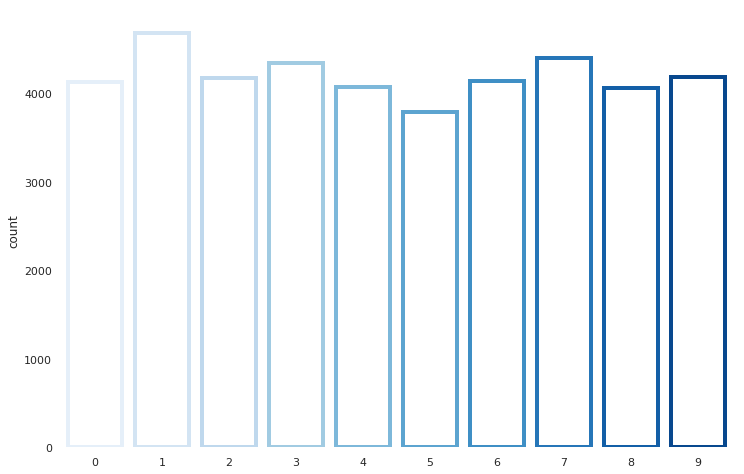

In [5]:
f, ax = plt.subplots(figsize=(12,8))
sns.countplot(y_train,
facecolor=(1, 1, 1, 0),
linewidth=4,
edgecolor=sns.color_palette("Blues", 10))
sns.despine(bottom=True, left=True)

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)

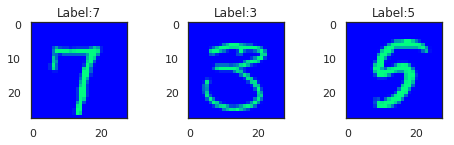

In [7]:
plt.figure(figsize=(8,6))
for i in range(6, 9):
    offset =0
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('winter'))
    plt.title( 'Label:' + str(y_train[i]));